In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from useful_functions import *
from opt_function import * 
from opt_function_for_real_data import *
from real_data_process import *

In [70]:
import importlib
import opt_function_for_real_data

# 修改了 opt_function_for_real_data 模块后，使用以下命令重新加载
importlib.reload(opt_function_for_real_data)

# 重新加载后再导入所有内容
from opt_function_for_real_data import *

load data

In [6]:
from scipy.io import loadmat 
m = loadmat('MNIST_digits_2_4.mat') # for Kun's data
X_train = m['X_train']
y_train = m['y_train'].transpose()
y_train = y_train.reshape(-1)
X_test = m["X_test"]
y_test = m["y_test"].transpose()
y_test = y_test.reshape(-1)

print(X_train.shape)

(12432, 784)


## test 1: pull sum更快吗？ lr的影响

In [18]:
n=20
d=784
L=621
A=get_xinmeng_like_matrix(n,seed=42).T
init_x=init_x_func(n=n,d=d,seed=42)

I=np.eye(n)

nodes_data = distribute_data(X=X_train, y=y_train, n_nodes=n)

h = np.stack([i for i, j in nodes_data], axis=0)  # 这将创建一个 (n, L, d) 形状的数组
y = np.stack([j for i, j in nodes_data], axis=0)  # 这将创建一个 (n, L) 形状的数组

# 检查形状以确保它们符合函数需求
print("Shape of h:", h.shape)  # 应该是 (n, L, d)
print("Shape of y:", y.shape)  # 应该是 (n, L)

Shape of h: (20, 621, 784)
Shape of y: (20, 621)


In [49]:
#大约需要 1 min
lr=1e-4
max_it=1000

A=get_xinmeng_like_matrix(n,seed=42).T
A=1/10*I+9/10*A

l1=new_pull_sum_real_data(A=A,B_index=9, init_x=init_x, h_data=h, y_data=y, X_test=X_test, y_test=y_test, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, accuracy_func=compute_accuracy, d=d, L=L, rho=0.1, lr=lr,sigma_n=1e-6, max_it=max_it, mg=1, decay=1)

s1=pull_sum_real_data(A=A, init_x=init_x, h_data=h, y_data=y, X_test=X_test, y_test=y_test, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, accuracy_func=compute_accuracy, d=d, L=L, rho=0.1, lr=lr,sigma_n=1e-6, max_it=max_it, mg=1, decay=1)

print('s1: 1/min(diag)最大值是：', max(s1[1]))

#大约需要 1 min
A=get_xinmeng_like_matrix(n,seed=42).T
A=2/10*I+8/10*A

l2=new_pull_sum_real_data(A=A,B_index=9, init_x=init_x, h_data=h, y_data=y, X_test=X_test, y_test=y_test, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, accuracy_func=compute_accuracy, d=d, L=L, rho=0.1, lr=lr,sigma_n=1e-6, max_it=max_it, mg=1, decay=1)

s2=pull_sum_real_data(A=A, init_x=init_x, h_data=h, y_data=y, X_test=X_test, y_test=y_test, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, accuracy_func=compute_accuracy, d=d, L=L, rho=0.1, lr=lr,sigma_n=1e-6, max_it=max_it, mg=1, decay=1)

print('s2: 1/min(diag)最大值是：', max(s2[1]))

#大约需要 1 min
A=get_xinmeng_like_matrix(n,seed=42).T
A=0.12*I+(1-0.12)*A

l3=new_pull_sum_real_data(A=A,B_index=9, init_x=init_x, h_data=h, y_data=y, X_test=X_test, y_test=y_test, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, accuracy_func=compute_accuracy, d=d, L=L, rho=0.1, lr=lr,sigma_n=1e-6, max_it=max_it, mg=1, decay=1)

s3=pull_sum_real_data(A=A, init_x=init_x, h_data=h, y_data=y, X_test=X_test, y_test=y_test, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, accuracy_func=compute_accuracy, d=d, L=L, rho=0.1, lr=lr,sigma_n=1e-6, max_it=max_it, mg=1, decay=1)

print('S3: 1/min(diag)最大值是：', max(s3[1]))

#大约需要 1 min
A=get_xinmeng_like_matrix(n,seed=42).T
A=0.14*I+(1-0.14)*A

l4=new_pull_sum_real_data(A=A,B_index=9, init_x=init_x, h_data=h, y_data=y, X_test=X_test, y_test=y_test, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, accuracy_func=compute_accuracy, d=d, L=L, rho=0.1, lr=lr,sigma_n=1e-6, max_it=max_it, mg=1, decay=1)

s4=pull_sum_real_data(A=A, init_x=init_x, h_data=h, y_data=y, X_test=X_test, y_test=y_test, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, accuracy_func=compute_accuracy, d=d, L=L, rho=0.1, lr=lr,sigma_n=1e-6, max_it=max_it, mg=1, decay=1)

print('s4: 1/min(diag)最大值是：', max(s4[1]))

#大约需要 1 min
A=get_xinmeng_like_matrix(n,seed=42).T
A=0.16*I+(1-0.16)*A

l5=new_pull_sum_real_data(A=A,B_index=9, init_x=init_x, h_data=h, y_data=y, X_test=X_test, y_test=y_test, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, accuracy_func=compute_accuracy, d=d, L=L, rho=0.1, lr=lr,sigma_n=1e-6, max_it=max_it, mg=1, decay=1)

s5=pull_sum_real_data(A=A, init_x=init_x, h_data=h, y_data=y, X_test=X_test, y_test=y_test, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, accuracy_func=compute_accuracy, d=d, L=L, rho=0.1, lr=lr,sigma_n=1e-6, max_it=max_it, mg=1, decay=1)

print('s5: 1/min(diag)最大值是：', max(s5[1]))

show_row(A)

s1: 1/min(diag)最大值是： 17206368339.542393
s2: 1/min(diag)最大值是： 1219408163.196226
S3: 1/min(diag)最大值是： 9117112859.67098
s4: 1/min(diag)最大值是： 4680994220.998812
s5: 1/min(diag)最大值是： 2903763698.894323
A的第二大特征值: 0.8870848581566785
A的beta: 0.9270016216460263
A的spectral gap: 0.07299837835397371
A的kappa: 65590729.05486921
S_A是: 2327.8836213394143 



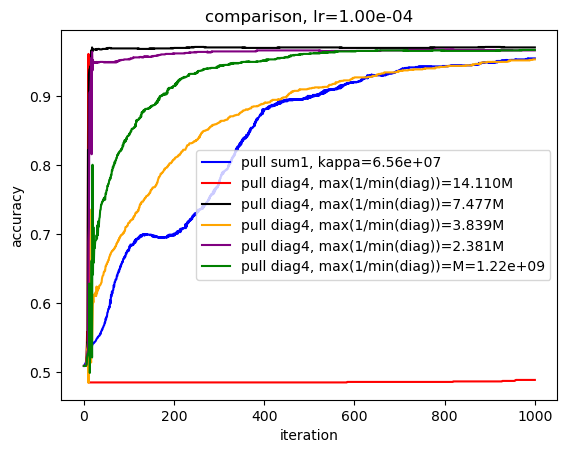

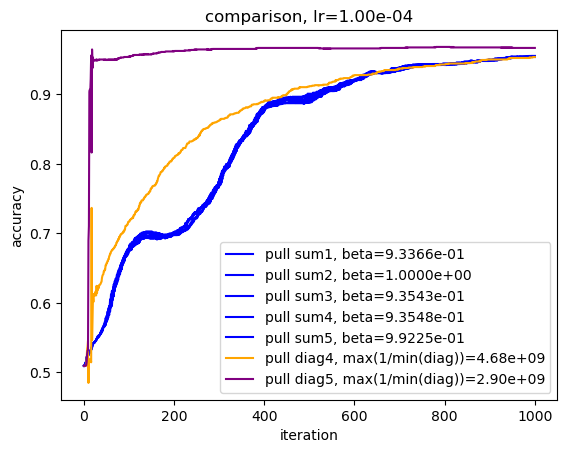

In [51]:
x0=range(len(l1[3]))
plt.plot(x0, l1[3], label=f"pull sum1, kappa={compute_kappa_row(1/10*I+9/10*A):.2e}", color='blue')  
plt.plot(x0, s1[4], label=f"pull diag4, max(1/min(diag))={(max(s1[1])/max(s2[1])):.3f}M", color='red')
plt.plot(x0, s3[4], label=f"pull diag4, max(1/min(diag))={(max(s3[1])/max(s2[1])):.3f}M", color='black')
plt.plot(x0, s4[4], label=f"pull diag4, max(1/min(diag))={(max(s4[1])/max(s2[1])):.3f}M", color='orange')
plt.plot(x0, s5[4], label=f"pull diag4, max(1/min(diag))={(max(s5[1])/max(s2[1])):.3f}M", color='purple')
plt.plot(x0, s2[4], label=f"pull diag4, max(1/min(diag))=M={max(s2[1]):.2e}", color='green')

plt.title(f'comparison, lr={lr:.2e}')
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.legend()
plt.show()
#---------------------------------------------------------------------------------------------------
x0=range(len(l1[3]))
plt.plot(x0, l1[3], label=f"pull sum1, beta={compute_beta_row(1/10*I+9/10*A):.4e}", color='blue')  
plt.plot(x0, l2[3], label=f"pull sum2, beta={compute_beta_row(2/10*I+9/10*A):.4e}", color='blue')  
plt.plot(x0, l3[3], label=f"pull sum3, beta={compute_beta_row(0.126*I+(1-0.126)*A):.4e}", color='blue')  
plt.plot(x0, l4[3], label=f"pull sum4, beta={compute_beta_row(0.1268*I+(1-0.1268)*A):.4e}", color='blue')  
plt.plot(x0, l5[3], label=f"pull sum5, beta={compute_beta_row(0.9*I+(1-0.9)*A):.4e}", color='blue')  
plt.plot(x0, s4[4], label=f"pull diag4, max(1/min(diag))={max(s4[1]):.2e}", color='orange')
plt.plot(x0, s5[4], label=f"pull diag5, max(1/min(diag))={max(s5[1]):.2e}", color='purple')

plt.title(f'comparison, lr={lr:.2e}')
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.legend()
plt.show()

但实际上学习率会造成影响，当学习率较大时，pull diag会表现地很差----------------

In [59]:
#大约需要 1 min
lr=8e-2
max_it=100

A=get_xinmeng_like_matrix(n,seed=42).T
A=1/10*I+9/10*A

l1=new_pull_sum_real_data(A=A,B_index=9, init_x=init_x, h_data=h, y_data=y, X_test=X_test, y_test=y_test, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, accuracy_func=compute_accuracy, d=d, L=L, rho=0.1, lr=lr,sigma_n=1e-6, max_it=max_it, mg=1, decay=1)

s1=pull_sum_real_data(A=A, init_x=init_x, h_data=h, y_data=y, X_test=X_test, y_test=y_test, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, accuracy_func=compute_accuracy, d=d, L=L, rho=0.1, lr=lr,sigma_n=1e-6, max_it=max_it, mg=1, decay=1)

print('s1: 1/min(diag)最大值是：', max(s1[1]))

#大约需要 1 min
A=get_xinmeng_like_matrix(n,seed=42).T
A=2/10*I+8/10*A

l2=new_pull_sum_real_data(A=A,B_index=9, init_x=init_x, h_data=h, y_data=y, X_test=X_test, y_test=y_test, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, accuracy_func=compute_accuracy, d=d, L=L, rho=0.1, lr=lr,sigma_n=1e-6, max_it=max_it, mg=1, decay=1)

s2=pull_sum_real_data(A=A, init_x=init_x, h_data=h, y_data=y, X_test=X_test, y_test=y_test, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, accuracy_func=compute_accuracy, d=d, L=L, rho=0.1, lr=lr,sigma_n=1e-6, max_it=max_it, mg=1, decay=1)

print('s2: 1/min(diag)最大值是：', max(s2[1]))

#大约需要 1 min
A=get_xinmeng_like_matrix(n,seed=42).T
A=0.12*I+(1-0.12)*A

l3=new_pull_sum_real_data(A=A,B_index=9, init_x=init_x, h_data=h, y_data=y, X_test=X_test, y_test=y_test, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, accuracy_func=compute_accuracy, d=d, L=L, rho=0.1, lr=lr,sigma_n=1e-6, max_it=max_it, mg=1, decay=1)

s3=pull_sum_real_data(A=A, init_x=init_x, h_data=h, y_data=y, X_test=X_test, y_test=y_test, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, accuracy_func=compute_accuracy, d=d, L=L, rho=0.1, lr=lr,sigma_n=1e-6, max_it=max_it, mg=1, decay=1)

print('S3: 1/min(diag)最大值是：', max(s3[1]))

#大约需要 1 min
A=get_xinmeng_like_matrix(n,seed=42).T
A=0.14*I+(1-0.14)*A

l4=new_pull_sum_real_data(A=A,B_index=9, init_x=init_x, h_data=h, y_data=y, X_test=X_test, y_test=y_test, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, accuracy_func=compute_accuracy, d=d, L=L, rho=0.1, lr=lr,sigma_n=1e-6, max_it=max_it, mg=1, decay=1)

s4=pull_sum_real_data(A=A, init_x=init_x, h_data=h, y_data=y, X_test=X_test, y_test=y_test, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, accuracy_func=compute_accuracy, d=d, L=L, rho=0.1, lr=lr,sigma_n=1e-6, max_it=max_it, mg=1, decay=1)

print('s4: 1/min(diag)最大值是：', max(s4[1]))

#大约需要 1 min
A=get_xinmeng_like_matrix(n,seed=42).T
A=0.16*I+(1-0.16)*A

l5=new_pull_sum_real_data(A=A,B_index=9, init_x=init_x, h_data=h, y_data=y, X_test=X_test, y_test=y_test, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, accuracy_func=compute_accuracy, d=d, L=L, rho=0.1, lr=lr,sigma_n=1e-6, max_it=max_it, mg=1, decay=1)

s5=pull_sum_real_data(A=A, init_x=init_x, h_data=h, y_data=y, X_test=X_test, y_test=y_test, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, accuracy_func=compute_accuracy, d=d, L=L, rho=0.1, lr=lr,sigma_n=1e-6, max_it=max_it, mg=1, decay=1)

print('s5: 1/min(diag)最大值是：', max(s5[1]))

show_row(A)

c:\Users\16017\Desktop\数值实验，pull diag\MNIST真实数据\useful_functions.py:121: RuntimeWarning: overflow encountered in exp
  exp_val = np.exp(y * h_dot_x)
c:\Users\16017\Desktop\数值实验，pull diag\MNIST真实数据\real_data_process.py:44: RuntimeWarning: overflow encountered in exp
  prob = 1 / (1 + np.exp(-z))


s1: 1/min(diag)最大值是： 16904192801.227867
s2: 1/min(diag)最大值是： 1422517560.309005
S3: 1/min(diag)最大值是： 8585983076.592369
s4: 1/min(diag)最大值是： 5107802229.521289
s5: 1/min(diag)最大值是： 3330906812.037483
A的第二大特征值: 0.8870848581566785
A的beta: 0.9270016216460263
A的spectral gap: 0.07299837835397371
A的kappa: 65590729.05486921
S_A是: 2327.8836213394143 



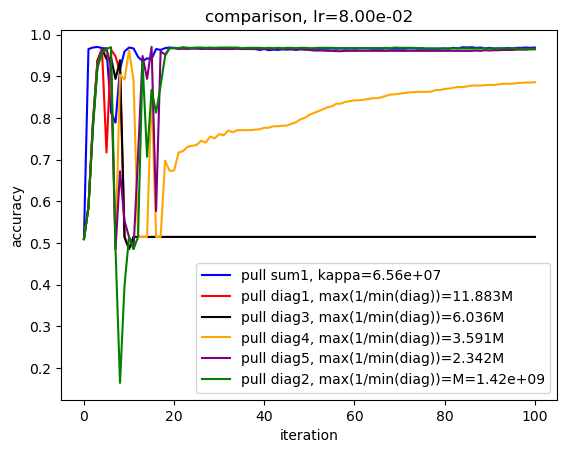

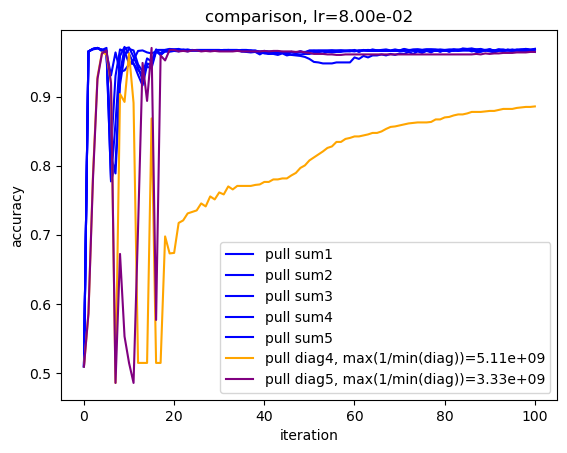

In [61]:
x0=range(len(l1[3]))
plt.plot(x0, l1[3], label=f"pull sum1, kappa={compute_kappa_row(1/10*I+9/10*A):.2e}", color='blue')  
plt.plot(x0, s1[4], label=f"pull diag1, max(1/min(diag))={(max(s1[1])/max(s2[1])):.3f}M", color='red')
plt.plot(x0, s3[4], label=f"pull diag3, max(1/min(diag))={(max(s3[1])/max(s2[1])):.3f}M", color='black')
plt.plot(x0, s4[4], label=f"pull diag4, max(1/min(diag))={(max(s4[1])/max(s2[1])):.3f}M", color='orange')
plt.plot(x0, s5[4], label=f"pull diag5, max(1/min(diag))={(max(s5[1])/max(s2[1])):.3f}M", color='purple')
plt.plot(x0, s2[4], label=f"pull diag2, max(1/min(diag))=M={max(s2[1]):.2e}", color='green')

plt.title(f'comparison, lr={lr:.2e}')
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.legend()
plt.show()
#---------------------------------------------------------------------------------------------------
x0=range(len(l1[3]))
plt.plot(x0, l1[3], label=f"pull sum1", color='blue')  
plt.plot(x0, l2[3], label=f"pull sum2", color='blue')  
plt.plot(x0, l3[3], label=f"pull sum3", color='blue')  
plt.plot(x0, l4[3], label=f"pull sum4", color='blue')  
plt.plot(x0, l5[3], label=f"pull sum5", color='blue')  
plt.plot(x0, s4[4], label=f"pull diag4, max(1/min(diag))={max(s4[1]):.2e}", color='orange')
plt.plot(x0, s5[4], label=f"pull diag5, max(1/min(diag))={max(s5[1]):.2e}", color='purple')

plt.title(f'comparison, lr={lr:.2e}')
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## test 2: pull diag 更快吗？ lr的影响

In [65]:
n=20
d=784
L=621
A=get_xinmeng_matrix(20).T
init_x=init_x_func(n=n,d=d,seed=42)

nodes_data = distribute_data(X=X_train, y=y_train, n_nodes=n)

h = np.stack([i for i, j in nodes_data], axis=0)  # 这将创建一个 (n, L, d) 形状的数组
y = np.stack([j for i, j in nodes_data], axis=0)  # 这将创建一个 (n, L) 形状的数组

# 检查形状以确保它们符合函数需求
print("Shape of h:", h.shape)  # 应该是 (n, L, d)
print("Shape of y:", y.shape)  # 应该是 (n, L)

show_row(A)

Shape of h: (20, 621, 784)
Shape of y: (20, 621)
A的第二大特征值: 0.3333333333333332
A的beta: 0.8021828098264313
A的spectral gap: 0.1978171901735687
A的kappa: 262144.0000054797
S_A是: 609.3444923710463 



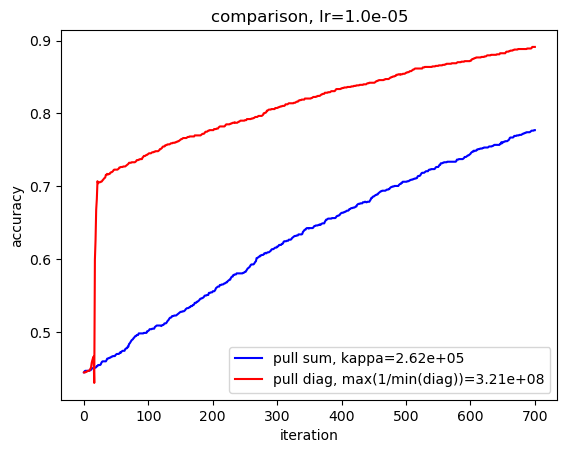

A的第二大特征值: 0.3333333333333332
A的beta: 0.8021828098264313
A的spectral gap: 0.1978171901735687
A的kappa: 262144.0000054797
S_A是: 609.3444923710463 



In [69]:
#大约需要 1 min
lr=1e-5
l1=new_pull_sum_real_data(A=A,B_index=9, init_x=init_x, h_data=h, y_data=y, X_test=X_test, y_test=y_test, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, accuracy_func=compute_accuracy, d=d, L=L, rho=0.1, lr=lr,sigma_n=1e-7, max_it=700, mg=1, decay=1)

l2=pull_sum_real_data(A=A, init_x=init_x, h_data=h, y_data=y, X_test=X_test, y_test=y_test, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, accuracy_func=compute_accuracy, d=d, L=L, rho=0.1, lr=lr,sigma_n=1e-7, max_it=700, mg=1, decay=1)

x0=range(len(l1[3]))
plt.plot(x0, l1[3], label=f"pull sum, kappa={compute_kappa_row(A):.2e}", color='b')  
plt.plot(x0, l2[4], label=f"pull diag, max(1/min(diag))={max(l2[1]):.2e}", color='r')
plt.title(f'comparison, lr={lr:.1e}')
plt.xlabel('iteration')
plt.ylabel('accuracy')

plt.legend()
plt.show()
show_row(A)

有趣的是，pull diag会在最初的几步内对性能有一个较大的提升（当然，也有可能是对性能有一个较大的下降），之后的增长似乎和pull sum十分相似了.

所以下面先让pull diag跑一段距离，然后在这个时刻的x上跑pull sum，看看差别

In [81]:
#大约需要 2 min
lr=1e-5
max_it=700

l1=new_pull_sum_real_data(A=A,B_index=9, init_x=init_x, h_data=h, y_data=y, X_test=X_test, y_test=y_test, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, accuracy_func=compute_accuracy, d=d, L=L, rho=0.1, lr=lr,sigma_n=1e-7, max_it=max_it, mg=1, decay=1)

l4=pull_sum_real_data(A=A, init_x=init_x, h_data=h, y_data=y, X_test=X_test, y_test=y_test, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, accuracy_func=compute_accuracy, d=d, L=L, rho=0.1, lr=lr,sigma_n=1e-7, max_it=max_it, mg=1, decay=1)

stop1=100

l2=pull_sum_real_data(A=A, init_x=init_x, h_data=h, y_data=y, X_test=X_test, y_test=y_test, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, accuracy_func=compute_accuracy, d=d, L=L, rho=0.1, lr=lr,sigma_n=1e-7, max_it=stop1, mg=1, decay=1)

l3=new_pull_sum_real_data(A=A,B_index=9, init_x=l2[6], h_data=h, y_data=y, X_test=X_test, y_test=y_test, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, accuracy_func=compute_accuracy, d=d, L=L, rho=0.1, lr=lr,sigma_n=1e-7, max_it=(max_it-stop1), mg=1, decay=1)

stop2=30

l5=pull_sum_real_data(A=A, init_x=init_x, h_data=h, y_data=y, X_test=X_test, y_test=y_test, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, accuracy_func=compute_accuracy, d=d, L=L, rho=0.1, lr=lr,sigma_n=1e-7, max_it=stop2, mg=1, decay=1)

l6=new_pull_sum_real_data(A=A,B_index=9, init_x=l2[6], h_data=h, y_data=y, X_test=X_test, y_test=y_test, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, accuracy_func=compute_accuracy, d=d, L=L, rho=0.1, lr=lr,sigma_n=1e-7, max_it=(max_it-stop2), mg=1, decay=1)

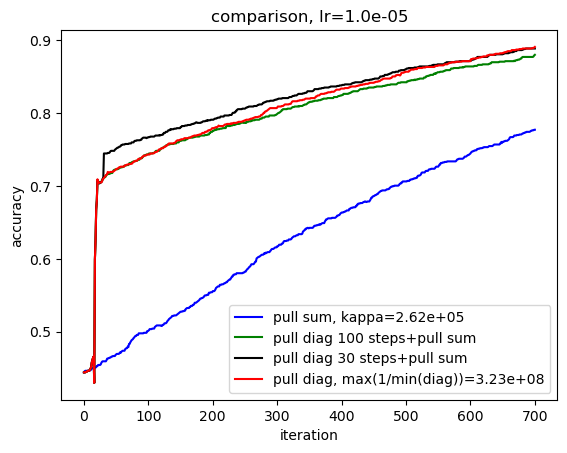

A的第二大特征值: 0.3333333333333332
A的beta: 0.8021828098264313
A的spectral gap: 0.1978171901735687
A的kappa: 262144.0000054797
S_A是: 609.3444923710463 



In [89]:
x0=range(len(l1[3]))
plt.plot(x0, l1[3], label=f"pull sum, kappa={compute_kappa_row(A):.2e}", color='b')  
plt.plot(x0, (l2[4]+l3[3][1:]), label=f"pull diag {stop1} steps+pull sum", color='g')
plt.plot(x0, (l5[4]+l6[3][1:]), label=f"pull diag {stop2} steps+pull sum", color='black')
plt.plot(x0, l4[4], label=f"pull diag, max(1/min(diag))={max(l2[1]):.2e}", color='r')


plt.title(f'comparison, lr={lr:.1e}')
plt.xlabel('iteration')
plt.ylabel('accuracy')

plt.legend()
plt.show()
show_row(A)

而在大的学习率上，pull sum会比pull diag更好

c:\Users\16017\Desktop\数值实验，pull diag\MNIST真实数据\useful_functions.py:121: RuntimeWarning: overflow encountered in exp
  exp_val = np.exp(y * h_dot_x)


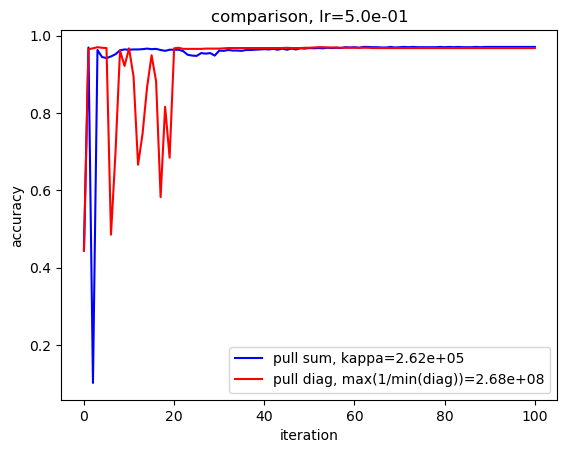

A的第二大特征值: 0.3333333333333332
A的beta: 0.8021828098264313
A的spectral gap: 0.1978171901735687
A的kappa: 262144.0000054797
S_A是: 609.3444923710463 



In [68]:
#大约需要 1 min
lr=0.5
l1=new_pull_sum_real_data(A=A,B_index=9, init_x=init_x, h_data=h, y_data=y, X_test=X_test, y_test=y_test, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, accuracy_func=compute_accuracy, d=d, L=L, rho=0.1, lr=lr,sigma_n=1e-7, max_it=100, mg=1, decay=1)

l2=pull_sum_real_data(A=A, init_x=init_x, h_data=h, y_data=y, X_test=X_test, y_test=y_test, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, accuracy_func=compute_accuracy, d=d, L=L, rho=0.1, lr=lr,sigma_n=1e-7, max_it=100, mg=1, decay=1)

x0=range(len(l1[3]))
plt.plot(x0, l1[3], label=f"pull sum, kappa={compute_kappa_row(A):.2e}", color='b')  
plt.plot(x0, l2[4], label=f"pull diag, max(1/min(diag))={max(l2[1]):.2e}", color='r')
plt.title(f'comparison, lr={lr:.1e}')
plt.xlabel('iteration')
plt.ylabel('accuracy')

plt.legend()
plt.show()
show_row(A)

## test 3: max(1/min(diag))对 pull diag的影响

In [128]:
n=20
d=784
L=621
A=get_xinmeng_like_matrix(n,seed=48).T
init_x=init_x_func(n=n,d=d,seed=42)

nodes_data = distribute_data(X=X_train, y=y_train, n_nodes=n)

h = np.stack([i for i, j in nodes_data], axis=0)  # 这将创建一个 (n, L, d) 形状的数组
y = np.stack([j for i, j in nodes_data], axis=0)  # 这将创建一个 (n, L) 形状的数组

# 检查形状以确保它们符合函数需求
print("Shape of h:", h.shape)  # 应该是 (n, L, d)
print("Shape of y:", y.shape)  # 应该是 (n, L)

show_row(A)

Shape of h: (20, 621, 784)
Shape of y: (20, 621)
A的第二大特征值: 0.6346848420331608
A的beta: 0.8823495662078805
A的spectral gap: 0.11765043379211948
A的kappa: 933822669.1303931
S_A是: 1646.2871178815888 



In [129]:
A0=A
I=np.eye(n)
A1=1/10*I+9/10*A

A3=3/10*I+7/10*A

A5=1/2*I+1/2*A

A7=7/10*I+3/10*A

A9=9/10*I+1/10*A

In [113]:
#大约需要 4 min
lr=0.1
max_it=1000

l1=new_pull_sum_real_data(A=A0,B_index=9, init_x=init_x, h_data=h, y_data=y, X_test=X_test, y_test=y_test, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, accuracy_func=compute_accuracy, d=d, L=L, rho=0.1, lr=lr,sigma_n=1e-6, max_it=max_it, mg=1, decay=1)
#接下来都是pull diag
s0=pull_sum_real_data(A=A0, init_x=init_x, h_data=h, y_data=y, X_test=X_test, y_test=y_test, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, accuracy_func=compute_accuracy, d=d, L=L, rho=0.1, lr=lr,sigma_n=1e-6, max_it=max_it, mg=1, decay=1)

s1=pull_sum_real_data(A=A1, init_x=init_x, h_data=h, y_data=y, X_test=X_test, y_test=y_test, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, accuracy_func=compute_accuracy, d=d, L=L, rho=0.1, lr=lr,sigma_n=1e-6, max_it=max_it, mg=1, decay=1)

s3=pull_sum_real_data(A=A3, init_x=init_x, h_data=h, y_data=y, X_test=X_test, y_test=y_test, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, accuracy_func=compute_accuracy, d=d, L=L, rho=0.1, lr=lr,sigma_n=1e-6, max_it=max_it, mg=1, decay=1)

s5=pull_sum_real_data(A=A5, init_x=init_x, h_data=h, y_data=y, X_test=X_test, y_test=y_test, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, accuracy_func=compute_accuracy, d=d, L=L, rho=0.1, lr=lr,sigma_n=1e-6, max_it=max_it, mg=1, decay=1)

s7=pull_sum_real_data(A=A7, init_x=init_x, h_data=h, y_data=y, X_test=X_test, y_test=y_test, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, accuracy_func=compute_accuracy, d=d, L=L, rho=0.1, lr=lr,sigma_n=1e-6, max_it=max_it, mg=1, decay=1)

s9=pull_sum_real_data(A=A9, init_x=init_x, h_data=h, y_data=y, X_test=X_test, y_test=y_test, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, accuracy_func=compute_accuracy, d=d, L=L, rho=0.1, lr=lr,sigma_n=1e-6, max_it=max_it, mg=1, decay=1)

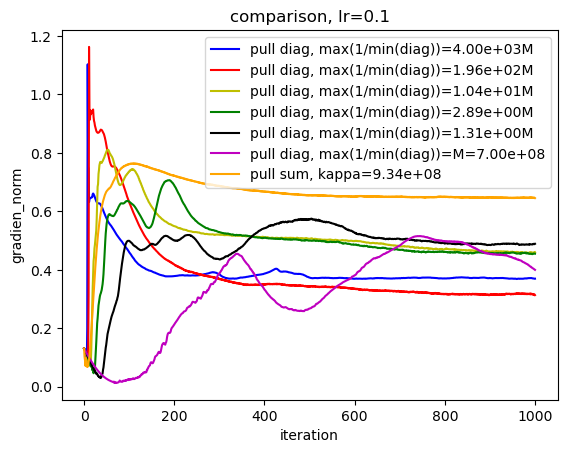

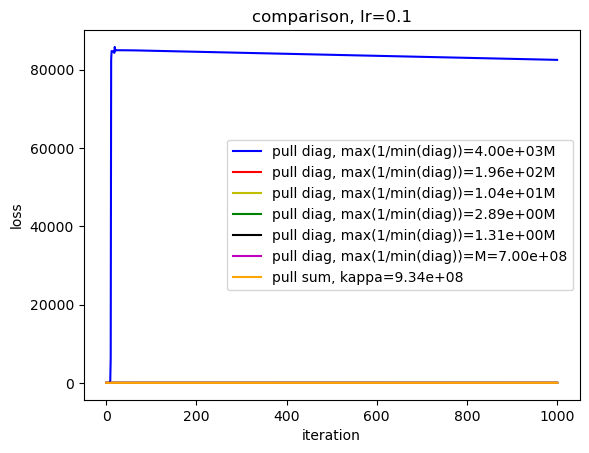

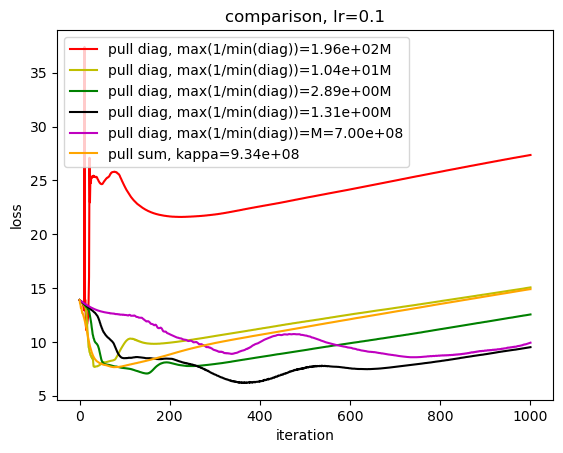

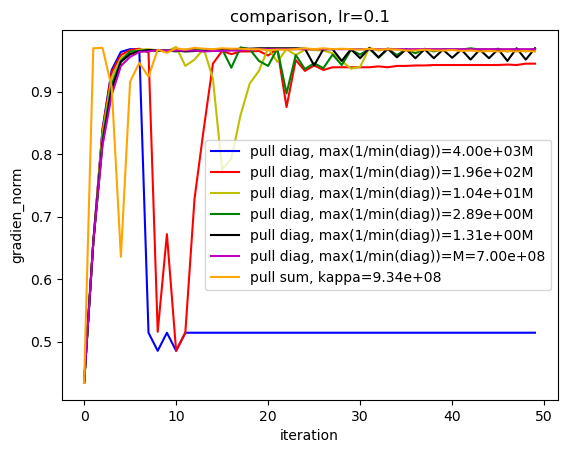

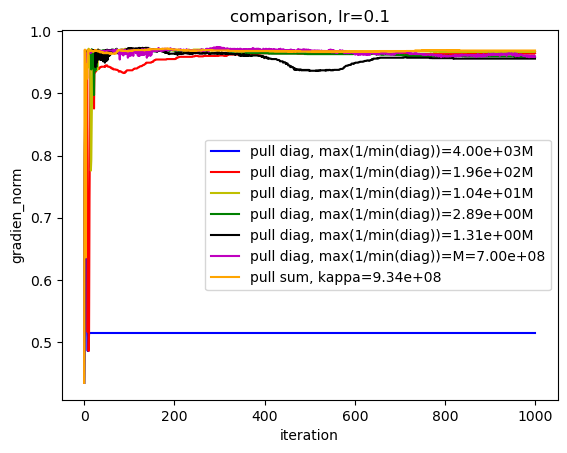

In [127]:
plt.plot(range(len(s0[0])), s0[0], label=f"pull diag, max(1/min(diag))={(max(s0[1])/max(s9[1])):.2e}M", color='b')
plt.plot(range(len(s1[0])), s1[0], label=f"pull diag, max(1/min(diag))={(max(s1[1])/max(s9[1])):.2e}M", color='r')
plt.plot(range(len(s3[0])), s3[0], label=f"pull diag, max(1/min(diag))={(max(s3[1])/max(s9[1])):.2e}M", color='y')
plt.plot(range(len(s5[0])), s5[0], label=f"pull diag, max(1/min(diag))={(max(s5[1])/max(s9[1])):.2e}M", color='g')
plt.plot(range(len(s7[0])), s7[0], label=f"pull diag, max(1/min(diag))={(max(s7[1])/max(s9[1])):.2e}M", color='k')
plt.plot(range(len(s9[0])), s9[0], label=f"pull diag, max(1/min(diag))=M={max(s9[1]):.2e}", color='m')
plt.plot(range(len(s9[0])), l1[0], label=f"pull sum, kappa={compute_kappa_row(A):.2e}", color='orange')
plt.title('comparison, lr=0.1')
plt.xlabel('iteration')
plt.ylabel('gradien_norm')
plt.legend()
plt.show()

plt.plot(range(len(s0[0])), s0[3], label=f"pull diag, max(1/min(diag))={(max(s0[1])/max(s9[1])):.2e}M", color='b')
plt.plot(range(len(s1[0])), s1[3], label=f"pull diag, max(1/min(diag))={(max(s1[1])/max(s9[1])):.2e}M", color='r')
plt.plot(range(len(s3[0])), s3[3], label=f"pull diag, max(1/min(diag))={(max(s3[1])/max(s9[1])):.2e}M", color='y')
plt.plot(range(len(s5[0])), s5[3], label=f"pull diag, max(1/min(diag))={(max(s5[1])/max(s9[1])):.2e}M", color='g')
plt.plot(range(len(s7[0])), s7[3], label=f"pull diag, max(1/min(diag))={(max(s7[1])/max(s9[1])):.2e}M", color='k')
plt.plot(range(len(s9[0])), s9[3], label=f"pull diag, max(1/min(diag))=M={max(s9[1]):.2e}", color='m')
plt.plot(range(len(s9[0])), l1[2], label=f"pull sum, kappa={compute_kappa_row(A):.2e}", color='orange')
plt.title('comparison, lr=0.1')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.legend()
plt.show()

#plt.plot(range(len(s0[0])), s0[3], label=f"pull diag, max(1/min(diag))={(max(s0[1])/max(s9[1])):.2e}M", color='b')
plt.plot(range(len(s1[0])), s1[3], label=f"pull diag, max(1/min(diag))={(max(s1[1])/max(s9[1])):.2e}M", color='r')
plt.plot(range(len(s3[0])), s3[3], label=f"pull diag, max(1/min(diag))={(max(s3[1])/max(s9[1])):.2e}M", color='y')
plt.plot(range(len(s5[0])), s5[3], label=f"pull diag, max(1/min(diag))={(max(s5[1])/max(s9[1])):.2e}M", color='g')
plt.plot(range(len(s7[0])), s7[3], label=f"pull diag, max(1/min(diag))={(max(s7[1])/max(s9[1])):.2e}M", color='k')
plt.plot(range(len(s9[0])), s9[3], label=f"pull diag, max(1/min(diag))=M={max(s9[1]):.2e}", color='m')
plt.plot(range(len(s9[0])), l1[2], label=f"pull sum, kappa={compute_kappa_row(A):.2e}", color='orange')
plt.title('comparison, lr=0.1')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.legend()
plt.show()

a=50
plt.plot(s0[4][:a], label=f"pull diag, max(1/min(diag))={(max(s0[1])/max(s9[1])):.2e}M", color='b')
plt.plot(s1[4][:a], label=f"pull diag, max(1/min(diag))={(max(s1[1])/max(s9[1])):.2e}M", color='r')
plt.plot(s3[4][:a], label=f"pull diag, max(1/min(diag))={(max(s3[1])/max(s9[1])):.2e}M", color='y')
plt.plot(s5[4][:a], label=f"pull diag, max(1/min(diag))={(max(s5[1])/max(s9[1])):.2e}M", color='g')
plt.plot(s7[4][:a], label=f"pull diag, max(1/min(diag))={(max(s7[1])/max(s9[1])):.2e}M", color='k')
plt.plot(s9[4][:a], label=f"pull diag, max(1/min(diag))=M={max(s9[1]):.2e}", color='m')
plt.plot(l1[3][:a], label=f"pull sum, kappa={compute_kappa_row(A):.2e}", color='orange')
plt.title('comparison, lr=0.1')
plt.xlabel('iteration')
plt.ylabel('gradien_norm')
plt.legend()
plt.show()

a=1000
plt.plot(s0[4][:a], label=f"pull diag, max(1/min(diag))={(max(s0[1])/max(s9[1])):.2e}M", color='b')
plt.plot(s1[4][:a], label=f"pull diag, max(1/min(diag))={(max(s1[1])/max(s9[1])):.2e}M", color='r')
plt.plot(s3[4][:a], label=f"pull diag, max(1/min(diag))={(max(s3[1])/max(s9[1])):.2e}M", color='y')
plt.plot(s5[4][:a], label=f"pull diag, max(1/min(diag))={(max(s5[1])/max(s9[1])):.2e}M", color='g')
plt.plot(s7[4][:a], label=f"pull diag, max(1/min(diag))={(max(s7[1])/max(s9[1])):.2e}M", color='k')
plt.plot(s9[4][:a], label=f"pull diag, max(1/min(diag))=M={max(s9[1]):.2e}", color='m')
plt.plot(l1[3][:a], label=f"pull sum, kappa={compute_kappa_row(A):.2e}", color='orange')
plt.title('comparison, lr=0.1')
plt.xlabel('iteration')
plt.ylabel('gradien_norm')
plt.legend()
plt.show()

对于比较小的学习率

In [130]:
#大约需要 4 min
lr=1e-4
max_it=1000

l1=new_pull_sum_real_data(A=A0,B_index=9, init_x=init_x, h_data=h, y_data=y, X_test=X_test, y_test=y_test, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, accuracy_func=compute_accuracy, d=d, L=L, rho=0.1, lr=lr,sigma_n=1e-6, max_it=max_it, mg=1, decay=1)
#接下来都是pull diag
s0=pull_sum_real_data(A=A0, init_x=init_x, h_data=h, y_data=y, X_test=X_test, y_test=y_test, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, accuracy_func=compute_accuracy, d=d, L=L, rho=0.1, lr=lr,sigma_n=1e-6, max_it=max_it, mg=1, decay=1)

s1=pull_sum_real_data(A=A1, init_x=init_x, h_data=h, y_data=y, X_test=X_test, y_test=y_test, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, accuracy_func=compute_accuracy, d=d, L=L, rho=0.1, lr=lr,sigma_n=1e-6, max_it=max_it, mg=1, decay=1)

s3=pull_sum_real_data(A=A3, init_x=init_x, h_data=h, y_data=y, X_test=X_test, y_test=y_test, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, accuracy_func=compute_accuracy, d=d, L=L, rho=0.1, lr=lr,sigma_n=1e-6, max_it=max_it, mg=1, decay=1)

s5=pull_sum_real_data(A=A5, init_x=init_x, h_data=h, y_data=y, X_test=X_test, y_test=y_test, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, accuracy_func=compute_accuracy, d=d, L=L, rho=0.1, lr=lr,sigma_n=1e-6, max_it=max_it, mg=1, decay=1)

s7=pull_sum_real_data(A=A7, init_x=init_x, h_data=h, y_data=y, X_test=X_test, y_test=y_test, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, accuracy_func=compute_accuracy, d=d, L=L, rho=0.1, lr=lr,sigma_n=1e-6, max_it=max_it, mg=1, decay=1)

s9=pull_sum_real_data(A=A9, init_x=init_x, h_data=h, y_data=y, X_test=X_test, y_test=y_test, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, accuracy_func=compute_accuracy, d=d, L=L, rho=0.1, lr=lr,sigma_n=1e-6, max_it=max_it, mg=1, decay=1)

c:\Users\16017\Desktop\数值实验，pull diag\MNIST真实数据\useful_functions.py:121: RuntimeWarning: overflow encountered in exp
  exp_val = np.exp(y * h_dot_x)


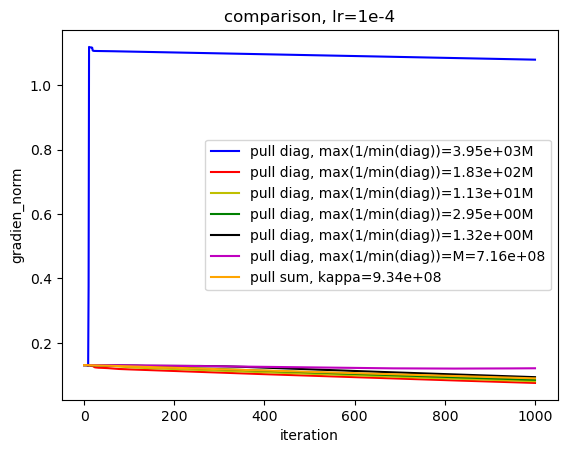

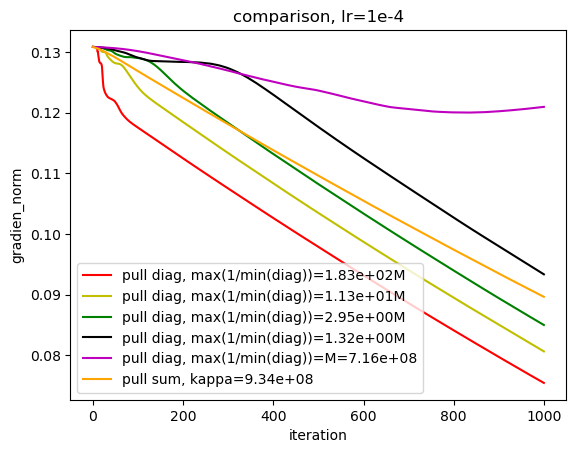

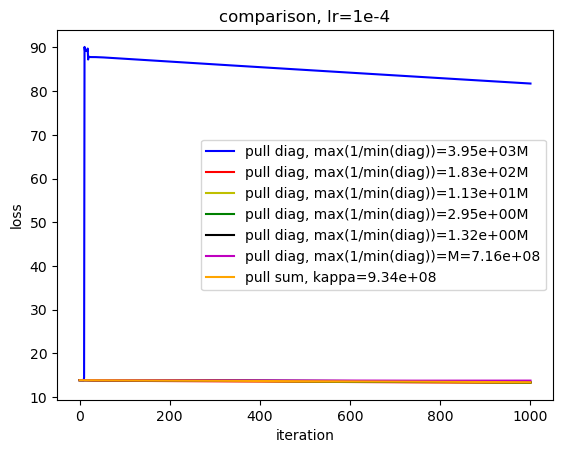

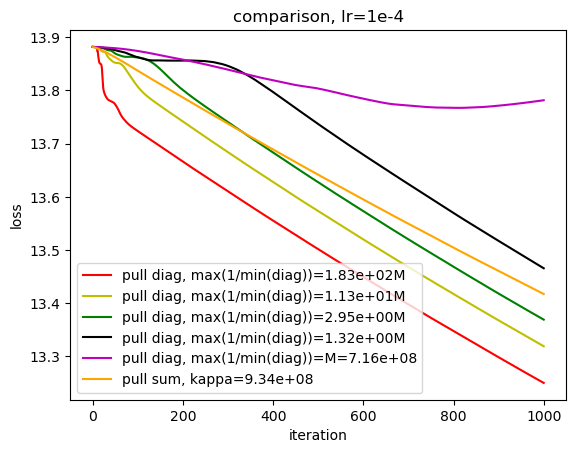

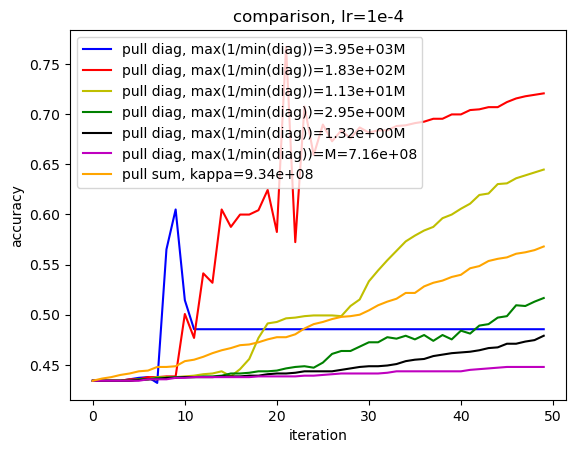

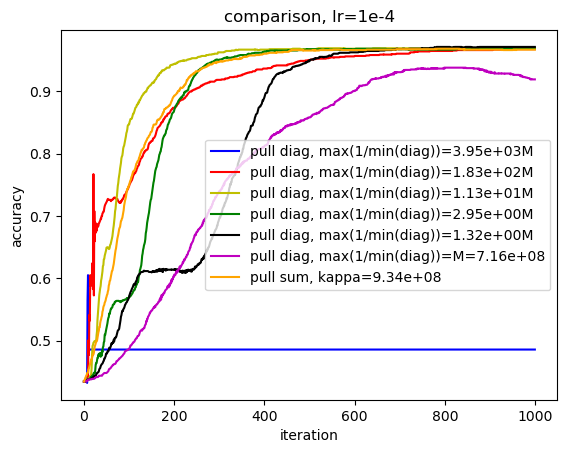

In [135]:
plt.plot(range(len(s0[0])), s0[0], label=f"pull diag, max(1/min(diag))={(max(s0[1])/max(s9[1])):.2e}M", color='b')
plt.plot(range(len(s1[0])), s1[0], label=f"pull diag, max(1/min(diag))={(max(s1[1])/max(s9[1])):.2e}M", color='r')
plt.plot(range(len(s3[0])), s3[0], label=f"pull diag, max(1/min(diag))={(max(s3[1])/max(s9[1])):.2e}M", color='y')
plt.plot(range(len(s5[0])), s5[0], label=f"pull diag, max(1/min(diag))={(max(s5[1])/max(s9[1])):.2e}M", color='g')
plt.plot(range(len(s7[0])), s7[0], label=f"pull diag, max(1/min(diag))={(max(s7[1])/max(s9[1])):.2e}M", color='k')
plt.plot(range(len(s9[0])), s9[0], label=f"pull diag, max(1/min(diag))=M={max(s9[1]):.2e}", color='m')
plt.plot(range(len(s9[0])), l1[0], label=f"pull sum, kappa={compute_kappa_row(A):.2e}", color='orange')
plt.title('comparison, lr=1e-4')
plt.xlabel('iteration')
plt.ylabel('gradien_norm')
plt.legend()
plt.show()

#plt.plot(range(len(s0[0])), s0[0], label=f"pull diag, max(1/min(diag))={(max(s0[1])/max(s9[1])):.2e}M", color='b')
plt.plot(range(len(s1[0])), s1[0], label=f"pull diag, max(1/min(diag))={(max(s1[1])/max(s9[1])):.2e}M", color='r')
plt.plot(range(len(s3[0])), s3[0], label=f"pull diag, max(1/min(diag))={(max(s3[1])/max(s9[1])):.2e}M", color='y')
plt.plot(range(len(s5[0])), s5[0], label=f"pull diag, max(1/min(diag))={(max(s5[1])/max(s9[1])):.2e}M", color='g')
plt.plot(range(len(s7[0])), s7[0], label=f"pull diag, max(1/min(diag))={(max(s7[1])/max(s9[1])):.2e}M", color='k')
plt.plot(range(len(s9[0])), s9[0], label=f"pull diag, max(1/min(diag))=M={max(s9[1]):.2e}", color='m')
plt.plot(range(len(s9[0])), l1[0], label=f"pull sum, kappa={compute_kappa_row(A):.2e}", color='orange')
plt.title('comparison, lr=1e-4')
plt.xlabel('iteration')
plt.ylabel('gradien_norm')
plt.legend()
plt.show()

plt.plot(range(len(s0[0])), s0[3], label=f"pull diag, max(1/min(diag))={(max(s0[1])/max(s9[1])):.2e}M", color='b')
plt.plot(range(len(s1[0])), s1[3], label=f"pull diag, max(1/min(diag))={(max(s1[1])/max(s9[1])):.2e}M", color='r')
plt.plot(range(len(s3[0])), s3[3], label=f"pull diag, max(1/min(diag))={(max(s3[1])/max(s9[1])):.2e}M", color='y')
plt.plot(range(len(s5[0])), s5[3], label=f"pull diag, max(1/min(diag))={(max(s5[1])/max(s9[1])):.2e}M", color='g')
plt.plot(range(len(s7[0])), s7[3], label=f"pull diag, max(1/min(diag))={(max(s7[1])/max(s9[1])):.2e}M", color='k')
plt.plot(range(len(s9[0])), s9[3], label=f"pull diag, max(1/min(diag))=M={max(s9[1]):.2e}", color='m')
plt.plot(range(len(s9[0])), l1[2], label=f"pull sum, kappa={compute_kappa_row(A):.2e}", color='orange')
plt.title('comparison, lr=1e-4')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.legend()
plt.show()

#plt.plot(range(len(s0[0])), s0[3], label=f"pull diag, max(1/min(diag))={(max(s0[1])/max(s9[1])):.2e}M", color='b')
plt.plot(range(len(s1[0])), s1[3], label=f"pull diag, max(1/min(diag))={(max(s1[1])/max(s9[1])):.2e}M", color='r')
plt.plot(range(len(s3[0])), s3[3], label=f"pull diag, max(1/min(diag))={(max(s3[1])/max(s9[1])):.2e}M", color='y')
plt.plot(range(len(s5[0])), s5[3], label=f"pull diag, max(1/min(diag))={(max(s5[1])/max(s9[1])):.2e}M", color='g')
plt.plot(range(len(s7[0])), s7[3], label=f"pull diag, max(1/min(diag))={(max(s7[1])/max(s9[1])):.2e}M", color='k')
plt.plot(range(len(s9[0])), s9[3], label=f"pull diag, max(1/min(diag))=M={max(s9[1]):.2e}", color='m')
plt.plot(range(len(s9[0])), l1[2], label=f"pull sum, kappa={compute_kappa_row(A):.2e}", color='orange')
plt.title('comparison, lr=1e-4')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.legend()
plt.show()

a=50
plt.plot(s0[4][:a], label=f"pull diag, max(1/min(diag))={(max(s0[1])/max(s9[1])):.2e}M", color='b')
plt.plot(s1[4][:a], label=f"pull diag, max(1/min(diag))={(max(s1[1])/max(s9[1])):.2e}M", color='r')
plt.plot(s3[4][:a], label=f"pull diag, max(1/min(diag))={(max(s3[1])/max(s9[1])):.2e}M", color='y')
plt.plot(s5[4][:a], label=f"pull diag, max(1/min(diag))={(max(s5[1])/max(s9[1])):.2e}M", color='g')
plt.plot(s7[4][:a], label=f"pull diag, max(1/min(diag))={(max(s7[1])/max(s9[1])):.2e}M", color='k')
plt.plot(s9[4][:a], label=f"pull diag, max(1/min(diag))=M={max(s9[1]):.2e}", color='m')
plt.plot(l1[3][:a], label=f"pull sum, kappa={compute_kappa_row(A):.2e}", color='orange')
plt.title('comparison, lr=1e-4')
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.legend()
plt.show()

a=1000
plt.plot(s0[4][:a], label=f"pull diag, max(1/min(diag))={(max(s0[1])/max(s9[1])):.2e}M", color='b')
plt.plot(s1[4][:a], label=f"pull diag, max(1/min(diag))={(max(s1[1])/max(s9[1])):.2e}M", color='r')
plt.plot(s3[4][:a], label=f"pull diag, max(1/min(diag))={(max(s3[1])/max(s9[1])):.2e}M", color='y')
plt.plot(s5[4][:a], label=f"pull diag, max(1/min(diag))={(max(s5[1])/max(s9[1])):.2e}M", color='g')
plt.plot(s7[4][:a], label=f"pull diag, max(1/min(diag))={(max(s7[1])/max(s9[1])):.2e}M", color='k')
plt.plot(s9[4][:a], label=f"pull diag, max(1/min(diag))=M={max(s9[1]):.2e}", color='m')
plt.plot(l1[3][:a], label=f"pull sum, kappa={compute_kappa_row(A):.2e}", color='orange')
plt.title('comparison, lr=1e-4')
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.legend()
plt.show()

test 4： 现在我们的首要目的就是调出pull sum表现地更好的情况，然后再研究超参数对于算法的影响